In [208]:
import numpy as np
import time
import matplotlib.pyplot as plt


In [209]:
class BarrierOptionPricer:
    def __init__(self, S0, K, H, T, r, sigma, simulations=1000, steps=100):
        self.S0 = S0         # Spot price
        self.K = K           # Strike price
        self.H = H           # Barrier level
        self.T = T           # Time to maturity
        self.r = r           # Risk-free interest rate
        self.sigma = sigma   # Volatility
        self.simulations = simulations
        self.steps = steps

    def _simulate_paths(self):
        """Utility method to simulate price paths based on the Monte Carlo method."""
        dt = self.T / self.steps
        nudt = (self.r - 0.5* self.sigma **2)*dt
        volsdt = self.sigma *np.sqrt(dt)
        erdt = np.exp(self.r*dt)
        
        # Monte Carlo Method
        Z = np.random.normal(size=(self.steps, self.simulations))
        delta_St = nudt + volsdt*Z
        ST = self.S0*np.cumprod( np.exp(delta_St), axis=0)
        ST = np.concatenate( (np.full(shape=(1, self.simulations), fill_value=self.S0), ST ) )

        return ST
    
    
    # Vanilla Put Option
    def VanillaPutprice(self, Graph=True):
        """Method to price the vanilla put option."""
        start_time = time.time()
        
        # Apply Barrier Condition to ST numpy array
        ST = self._simulate_paths()
        S = ST.copy()

        CT = np.maximum(0, self.K - ST[-1][ST[-1] != 0])
        C0 = np.exp(-self.r*self.T)*np.sum(CT)/self.simulations

        sigma = np.sqrt( np.sum( (np.exp(-self.r*self.T)*CT - C0)**2) / (self.simulations-1) )
        sigma = np.std(np.exp(-self.r*self.T)*CT)
        SE = sigma/np.sqrt(self.simulations)
        
        print("Put value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
        print("Computation time is: ", round(time.time() - start_time,4))
        
        if Graph:
            plt.figure(figsize=(8,6))
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
            
            plt.plot(np.linspace(0,self.T,self.steps+1),S,'b')
            plt.xlim(0,1)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Vanilla Put Option')
            plt.show()
    
        return C0, SE
    
    # Vanilla Call Option
    def VanillaCallprice(self, Graph=True):
        """Method to price the vanilla call option."""
        start_time = time.time()
        
        # Apply Barrier Condition to ST numpy array
        ST = self._simulate_paths()
        S = ST.copy()

        CT = np.maximum(0, ST[-1][ST[-1] != 0] - self.K)
        C0 = np.exp(-self.r*self.T)*np.sum(CT)/self.simulations

        sigma = np.sqrt( np.sum( (np.exp(-self.r*self.T)*CT - C0)**2) / (self.simulations-1) )
        sigma = np.std(np.exp(-self.r*self.T)*CT)
        SE = sigma/np.sqrt(self.simulations)
        
        print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
        print("Computation time is: ", round(time.time() - start_time,4))
        
        if Graph:
            plt.figure(figsize=(8,6))
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
            
            plt.plot(np.linspace(0,self.T,self.steps+1),S,'b')
            plt.xlim(0,1)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Vanilla Put Option')
            plt.show()
    
        return C0, SE
            
    # Up-and-Out Put Option
    def UOPutprice(self, Graph=True):
        """Method to price the up-and-out put option."""
        start_time = time.time()
        
        # Apply Barrier Condition to ST numpy array
        ST = self._simulate_paths()
        S = ST.copy()
        mask = np.any(ST >= self.H, axis=0)
        ST[:,mask] = 0

        CT = np.maximum(0, self.K - ST[-1][ST[-1] != 0])
        C0 = np.exp(-self.r*self.T)*np.sum(CT)/self.simulations

        sigma = np.sqrt( np.sum( (np.exp(-self.r*self.T)*CT - C0)**2) / (self.simulations-1) )
        sigma = np.std(np.exp(-self.r*self.T)*CT)
        SE = sigma/np.sqrt(self.simulations)
        
        print("Put value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
        print("Computation time is: ", round(time.time() - start_time,4))
        
        if Graph:
            plt.figure(figsize=(8,6))
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
            
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,mask],'r')
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,~mask],'g')
            plt.plot([0,self.T],[self.H,self.H], 'k-',linewidth=5.0)
            plt.annotate('H', (0.05,130))
            plt.xlim(0,1)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Up-and-Out Put Option')
            plt.show()
        
        return C0, SE
            
    # Up-and-In Put Option
    def UIPutprice(self, Graph=True):
        """Method to price the up-and-in put option."""
        start_time = time.time()
    
        # Apply Barrier Condition to ST numpy array
        ST = self._simulate_paths()
        S = ST.copy()
        mask = np.any(ST >= self.H, axis=0)
        ST[:,~mask] = 0

        CT = np.maximum(0, self.K - ST[-1][ST[-1] != 0])
        C0 = np.exp(-self.r*self.T)*np.sum(CT)/self.simulations

        sigma = np.sqrt( np.sum( (np.exp(-self.r*self.T)*CT - C0)**2) / (self.simulations-1) )
        sigma = np.std(np.exp(-self.r*self.T)*CT)
        SE = sigma/np.sqrt(self.simulations)
    
        print("Put value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
        print("Computation time is: ", round(time.time() - start_time,4))
    
        if Graph:
            plt.figure(figsize=(8,6))
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
        
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,~mask],'r')
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,mask],'g')
            plt.plot([0,self.T],[self.H,self.H], 'k-',linewidth=5.0)
            plt.annotate('H', (0.05,130))
            plt.xlim(0,1)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Up-and-In Put Option')
            plt.show()
        
        return C0, SE
            
    # Down-and-Out Put Option
    def DOPutprice(self, Graph=True):
        """Method to price the down-and-out put option."""
        start_time = time.time()
    
        # Apply Barrier Condition to ST numpy array
        ST = self._simulate_paths()
        S = ST.copy()
        mask = np.any(ST <= self.H, axis=0)
        ST[:,mask] = 0

        CT = np.maximum(0, self.K - ST[-1][ST[-1] != 0])
        C0 = np.exp(-self.r*self.T)*np.sum(CT)/self.simulations

        sigma = np.sqrt( np.sum( (np.exp(-self.r*self.T)*CT - C0)**2) / (self.simulations-1) )
        sigma = np.std(np.exp(-self.r*self.T)*CT)
        SE = sigma/np.sqrt(self.simulations)
    
        print("Put value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
        print("Computation time is: ", round(time.time() - start_time,4))
    
        if Graph:
            plt.figure(figsize=(8,6))
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
        
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,mask],'r')
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,~mask],'g')
            plt.plot([0,self.T],[self.H,self.H], 'k-',linewidth=5.0)
            plt.annotate('H', (0.05,130))
            plt.xlim(0,1)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Down-and-Out Put Option')
            plt.show()
    
        return C0, SE
    
    # Down-and-In Put Option
    def DIPutprice(self, Graph=True):
        """Method to price the down-and-in put option."""
        start_time = time.time()
    
        # Apply Barrier Condition to ST numpy array
        ST = self._simulate_paths()
        S = ST.copy()
        mask = np.any(ST <= self.H, axis=0)
        ST[:,~mask] = 0

        CT = np.maximum(0, self.K - ST[-1][ST[-1] != 0])
        C0 = np.exp(-self.r*self.T)*np.sum(CT)/self.simulations

        sigma = np.sqrt( np.sum( (np.exp(-self.r*self.T)*CT - C0)**2) / (self.simulations-1) )
        sigma = np.std(np.exp(-self.r*self.T)*CT)
        SE = sigma/np.sqrt(self.simulations)
    
        print("Put value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
        print("Computation time is: ", round(time.time() - start_time,4))
    
        if Graph:
            plt.figure(figsize=(8,6))
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
        
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,~mask],'r')
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,mask],'g')
            plt.plot([0,self.T],[self.H,self.H], 'k-',linewidth=5.0)
            plt.annotate('H', (0.05,130))
            plt.xlim(0,1)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Down-and-In Put Option')
            plt.show()
            
        return C0, SE
    
    # Up-and-Out Call Option
    def UOCallprice(self, Graph=True):
        """Utility method to price the up-and-out call option."""
        start_time = time.time()
        
        # Apply Barrier Condition to ST numpy array
        ST = self._simulate_paths()
        S = ST.copy()
        mask = np.any(ST >= self.H, axis=0)
        ST[:,mask] = 0

        CT = np.maximum(0, ST[-1][ST[-1] != 0] - self.K)
        C0 = np.exp(-self.r*self.T)*np.sum(CT)/self.simulations

        sigma = np.sqrt( np.sum( (np.exp(-self.r*self.T)*CT - C0)**2) / (self.simulations-1) )
        sigma = np.std(np.exp(-self.r*self.T)*CT)
        SE = sigma/np.sqrt(self.simulations)
        
        print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
        print("Computation time is: ", round(time.time() - start_time,4))
    
        if Graph:
            plt.figure(figsize=(8,6))
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
            
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,mask],'r')
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,~mask],'g')
            plt.plot([0,self.T],[self.H,self.H], 'k-',linewidth=5.0)
            plt.annotate('H', (0.05,130))
            plt.xlim(0,1)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Up-and-Out Call Option')
            plt.show()
        
        return C0, SE
    
    # Up-and-In Call Option
    def UICallprice(self, Graph=True):
        """Utility method to price the up-and-in call option."""
        start_time = time.time()
        
        # Apply Barrier Condition to ST numpy array
        ST = self._simulate_paths()
        S = ST.copy()
        mask = np.any(ST >= self.H, axis=0)
        ST[:,~mask] = 0

        CT = np.maximum(0, ST[-1][ST[-1] != 0] - self.K)
        C0 = np.exp(-self.r*self.T)*np.sum(CT)/self.simulations

        sigma = np.sqrt( np.sum( (np.exp(-self.r*self.T)*CT - C0)**2) / (self.simulations-1) )
        sigma = np.std(np.exp(-self.r*self.T)*CT)
        SE = sigma/np.sqrt(self.simulations)
        
        print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
        print("Computation time is: ", round(time.time() - start_time,4))
        
        if Graph:
            plt.figure(figsize=(8,6))
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
            
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,~mask],'r')
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,mask],'g')
            plt.plot([0,self.T],[self.H,self.H], 'k-',linewidth=5.0)
            plt.annotate('H', (0.05,130))
            plt.xlim(0,1)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Up-and-In Call Option')
            plt.show()
    
        return C0, SE
            
    # Down-and-Out Call Option
    def DOCallprice(self, Graph=True):
        """Method to price the down-and-out call option."""
        start_time = time.time()
    
        # Apply Barrier Condition to ST numpy array
        ST = self._simulate_paths()
        S = ST.copy()
        mask = np.any(ST <= self.H, axis=0)
        ST[:,mask] = 0

        CT = np.maximum(0, ST[-1][ST[-1] != 0] - self.K)
        C0 = np.exp(-self.r*self.T)*np.sum(CT)/self.simulations

        sigma = np.sqrt( np.sum( (np.exp(-self.r*self.T)*CT - C0)**2) / (self.simulations-1) )
        sigma = np.std(np.exp(-self.r*self.T)*CT)
        SE = sigma/np.sqrt(self.simulations)
    
        print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
        print("Computation time is: ", round(time.time() - start_time,4))
    
        if Graph:
            plt.figure(figsize=(8,6))
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
        
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,mask],'r')
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,~mask],'g')
            plt.plot([0,self.T],[self.H,self.H], 'k-',linewidth=5.0)
            plt.annotate('H', (0.05,130))
            plt.xlim(0,1)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Down-and-Out Call Option')
            plt.show()
        
        return C0, SE
            
    # Down-and-In Call Option
    def DICallprice(self, Graph=True):
        """Method to price the down-and-in call option."""
        start_time = time.time()
    
        # Apply Barrier Condition to ST numpy array
        ST = self._simulate_paths()
        S = ST.copy()
        mask = np.any(ST <= self.H, axis=0)
        ST[:,~mask] = 0

        CT = np.maximum(0, ST[-1][ST[-1] != 0] - self.K)
        C0 = np.exp(-self.r*self.T)*np.sum(CT)/self.simulations

        sigma = np.sqrt( np.sum( (np.exp(-self.r*self.T)*CT - C0)**2) / (self.simulations-1) )
        sigma = np.std(np.exp(-self.r*self.T)*CT)
        SE = sigma/np.sqrt(self.simulations)
    
        print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))
        print("Computation time is: ", round(time.time() - start_time,4))
    
        if Graph:
            plt.figure(figsize=(8,6))
            plt.rcParams["font.family"] = "Times New Roman"
            plt.rcParams["font.size"] = "16"
        
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,~mask],'r')
            plt.plot(np.linspace(0,self.T,self.steps+1),S[:,mask],'g')
            plt.plot([0,self.T],[self.H,self.H], 'k-',linewidth=5.0)
            plt.annotate('H', (0.05,130))
            plt.xlim(0,1)
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.title('European Down-and-In Call Option')
            plt.show()
        
        return C0, SE

# Example usage:

Call value is $0.22 with SE +/- 0.121
Computation time is:  0.0098


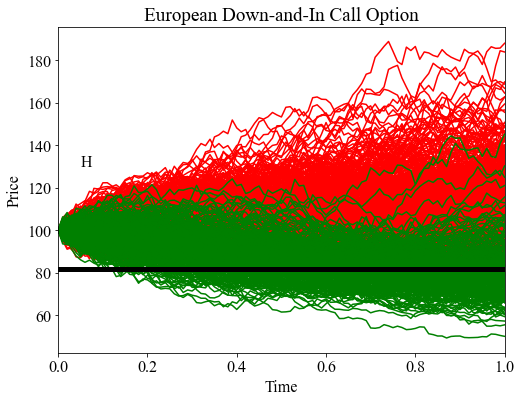

In [210]:
option_pricer = BarrierOptionPricer(S0=100, K=100, H=82, T=1, r=0.01, sigma=0.2, simulations= 1000, steps=100)

Down_and_In_Call = option_pricer.DICallprice(Graph=True)

In [235]:
option_pricer_small = BarrierOptionPricer(S0=100, K=100, H=82, T=1, r=0.01, sigma=0.2, simulations= 500, steps=100)
small_sample = option_pricer_small.DICallprice(Graph=False)

option_pricer_big = BarrierOptionPricer(S0=100, K=100, H=82, T=1, r=0.01, sigma=0.2, simulations= 500000, steps=100)
big_sample = option_pricer_big.DICallprice(Graph=False)

Call value is $0.06 with SE +/- 0.055
Computation time is:  0.0082
Call value is $0.13 with SE +/- 0.003
Computation time is:  5.5447
